# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_id = []
city_name = []
country = []
latitude = []
longitude = []
weather_date = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

counter = 0
# For each cities in cities list, get data
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        weather_date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        counter = counter + 1
    
            
        print(f"Processing city number {counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Next city...")


print("City Data Complete")


Processing city number 1 : santa isabel
City not found. Next city...
Processing city number 2 : santiago del estero
Processing city number 3 : lavrentiya
Processing city number 4 : bredasdorp
Processing city number 5 : tarashcha
Processing city number 6 : castro
Processing city number 7 : praia da vitoria
Processing city number 8 : rikitea
Processing city number 9 : jamestown
Processing city number 10 : khani
Processing city number 11 : ituporanga
Processing city number 12 : chokurdakh
Processing city number 13 : vaini
Processing city number 14 : nikolskoye
Processing city number 15 : tura
Processing city number 16 : gunnedah
Processing city number 17 : cape town
Processing city number 18 : georgetown
Processing city number 19 : albany
Processing city number 20 : dunedin
Processing city number 21 : hilo
Processing city number 22 : lupiro
City not found. Next city...
Processing city number 23 : mataura
Processing city number 24 : sinazongwe
Processing city number 25 : santa cruz
City no

Processing city number 205 : qixia
Processing city number 206 : morehead
Processing city number 207 : ayan
Processing city number 208 : semey
Processing city number 209 : thinadhoo
Processing city number 210 : bethel
Processing city number 211 : beringovskiy
Processing city number 212 : butaritari
Processing city number 213 : monywa
Processing city number 214 : hamilton
Processing city number 215 : yetkul
Processing city number 216 : sobolevo
City not found. Next city...
Processing city number 217 : olafsvik
Processing city number 218 : oistins
Processing city number 219 : camacha
City not found. Next city...
Processing city number 220 : kabinda
Processing city number 221 : siddapur
Processing city number 222 : bouca
Processing city number 223 : aklavik
Processing city number 224 : salalah
Processing city number 225 : mago
Processing city number 226 : maningrida
Processing city number 227 : thompson
Processing city number 228 : kisesa
Processing city number 229 : college
Processing cit

Processing city number 409 : stepnyak
Processing city number 410 : palmer
Processing city number 411 : tessalit
Processing city number 412 : barretos
City not found. Next city...
Processing city number 413 : nathdwara
Processing city number 414 : vanavara
Processing city number 415 : van buren
Processing city number 416 : lulea
Processing city number 417 : paamiut
Processing city number 418 : porto novo
Processing city number 419 : lixourion
Processing city number 420 : salym
Processing city number 421 : kutum
Processing city number 422 : nova vicosa
Processing city number 423 : binga
Processing city number 424 : aksu
Processing city number 425 : chapais
City not found. Next city...
Processing city number 426 : vila do maio
Processing city number 427 : aswan
City not found. Next city...
Processing city number 428 : yanji
Processing city number 429 : namatanai
Processing city number 430 : serenje
Processing city number 431 : sungaipenuh
Processing city number 432 : the pas
Processing ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({'City' : city_name,
                          'Country' : country ,
                          'Lat' : latitude , 
                          'Lng' : longitude ,
                          'Date' : weather_date ,
                          'Max Temp' : temp ,
                          'Humidity' : humidity ,
                          'Cloudiness' : cloudiness ,
                          'Wind Speed' : wind_speed })
weather_df.to_csv("../../output_data/cities.csv", index = False)

In [5]:
weather_df

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Cloudiness,Wind Speed
0,Santa Isabel,BR,-23.32,-46.22,1607623292,82.40,51,40,8.05
1,Santiago del Estero,AR,-27.80,-64.26,1607623313,107.01,21,0,11.01
2,Lavrentiya,RU,65.58,-171.00,1607623300,7.20,89,0,7.34
3,Bredasdorp,ZA,-34.53,20.04,1607623274,66.20,72,46,5.82
4,Tarashcha,UA,49.56,30.49,1607623313,33.78,95,100,17.69
...,...,...,...,...,...,...,...,...,...
553,Hvolsvollur,IS,63.75,-20.22,1607623405,44.60,87,90,24.16
554,Kargat,RU,55.20,80.28,1607623405,12.63,95,100,13.09
555,Joshīmath,IN,30.57,79.57,1607623406,41.04,53,6,6.69
556,Viedma,AR,-40.81,-63.00,1607623406,91.00,35,17,5.01


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_df['Humidity'].astype(float)
weather_sorted = weather_df.sort_values(by='Humidity', ascending=False)
weather_sorted
#Sorted shows none are above 100

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Cloudiness,Wind Speed
348,North Bend,US,43.41,-124.22,1607623323,44.01,100,75,8.05
461,Hérouville-Saint-Clair,FR,49.21,-0.31,1607623390,44.60,100,75,9.17
55,Carnarvon,AU,-24.87,113.63,1607623322,71.60,100,75,12.75
266,Mrągowo,PL,53.86,21.31,1607623357,28.40,100,90,8.05
70,Fløng,DK,55.66,12.19,1607623324,37.00,100,100,10.29
...,...,...,...,...,...,...,...,...,...
68,Gouré,NE,13.98,10.27,1607623324,86.00,16,77,1.99
203,Gobabis,NA,-22.45,18.97,1607623347,87.03,13,0,4.45
338,Boussé,BF,12.66,-1.89,1607623334,96.80,13,14,5.82
520,San Juan,AR,-31.54,-68.54,1607623365,105.78,13,1,18.68


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

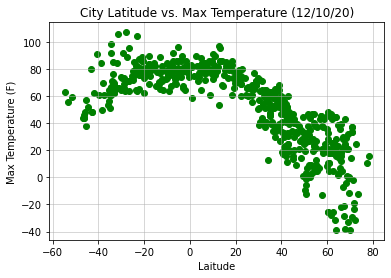

In [9]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "green")

# Set title
plt.title("City Latitude vs. Max Temperature (12/10/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
#plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

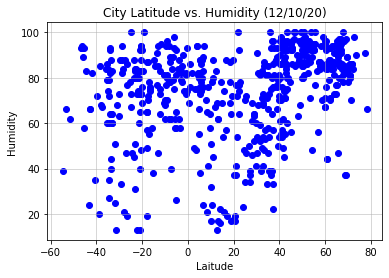

In [10]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "blue")

# Set title
plt.title("City Latitude vs. Humidity (12/10/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Cloudiness Plot

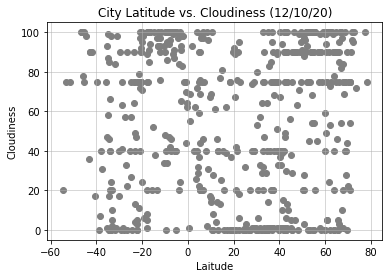

In [11]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "grey")

# Set title
plt.title("City Latitude vs. Cloudiness (12/10/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Wind Speed Plot

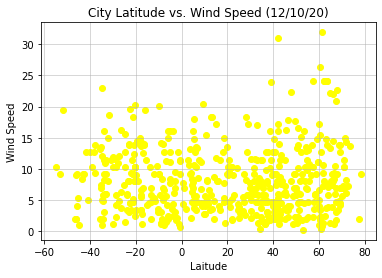

In [12]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "yellow")

# Set title
plt.title("City Latitude vs. Wind Speed (12/10/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Linear Regression

In [13]:
northern_hemi = weather_df.loc[weather_df['Lat'] > 0]
southern_hemi = weather_df.loc[weather_df['Lat'] <= 0]

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Cloudiness,Wind Speed
2,Lavrentiya,RU,65.58,-171.00,1607623300,7.20,89,0,7.34
4,Tarashcha,UA,49.56,30.49,1607623313,33.78,95,100,17.69
6,Praia da Vitória,PT,38.73,-27.07,1607623314,68.00,77,40,10.16
8,Jamestown,US,42.10,-79.24,1607623118,41.00,74,90,3.36
9,Khani,GE,41.96,42.96,1607623314,48.20,71,0,31.09
...,...,...,...,...,...,...,...,...,...
552,Half Moon Bay,US,37.46,-122.43,1607623342,57.99,76,75,7.76
553,Hvolsvollur,IS,63.75,-20.22,1607623405,44.60,87,90,24.16
554,Kargat,RU,55.20,80.28,1607623405,12.63,95,100,13.09
555,Joshīmath,IN,30.57,79.57,1607623406,41.04,53,6,6.69


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7075056739327792


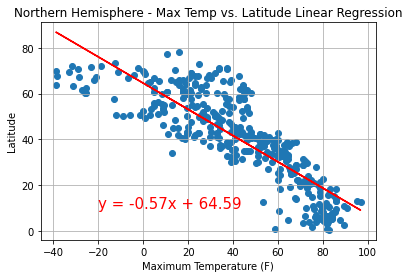

In [21]:
x_values = northern_hemi['Max Temp']
y_values = northern_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.xlabel('Maximum Temperature (F)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.25282372003085335


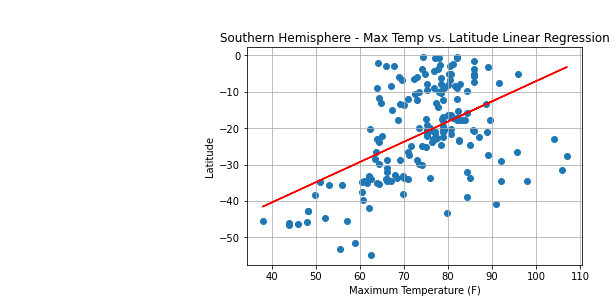

In [22]:
x_values = southern_hemi['Max Temp']
y_values = southern_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.xlabel('Maximum Temperature (F)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18398971285495733


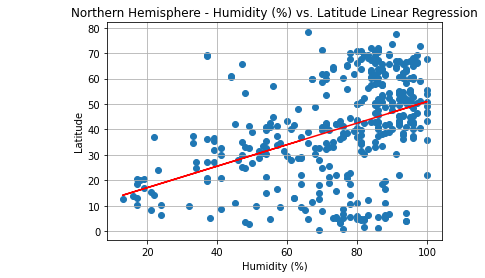

In [23]:
x_values = northern_hemi['Humidity']
y_values = northern_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.028976454334766505


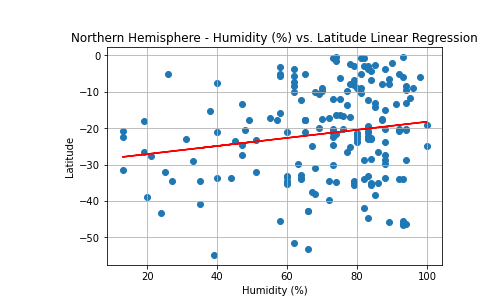

In [24]:
x_values = southern_hemi['Humidity']
y_values = southern_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05444532682283794


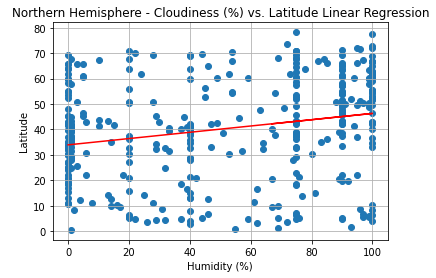

In [25]:
x_values = northern_hemi['Cloudiness']
y_values = northern_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.044453677564286004


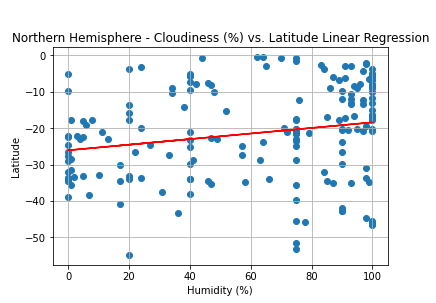

In [27]:
x_values = southern_hemi['Cloudiness']
y_values = southern_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0069765187829731005


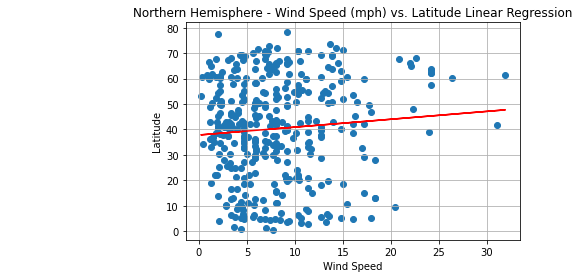

In [29]:
x_values = northern_hemi['Wind Speed']
y_values = northern_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = southern_hemi['Wind Speed']
y_values = southern_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()